In [8]:
import numpy as np
import matplotlib.pyplot as plt

import mplhep as hep

## Style example

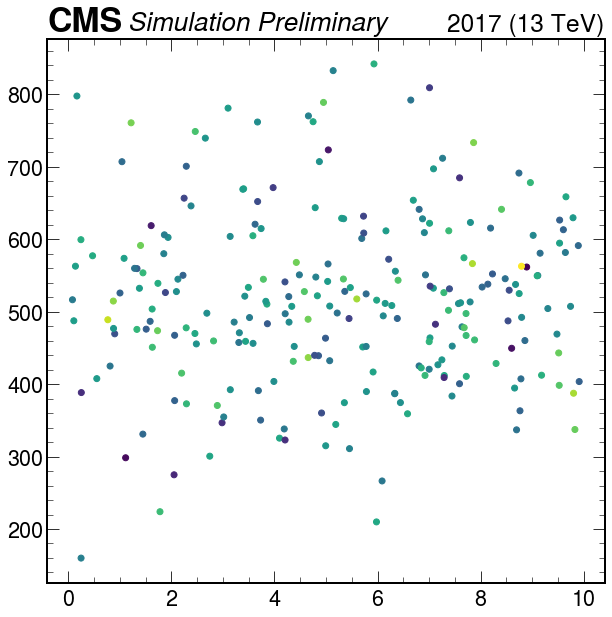

In [9]:
x = np.random.uniform(0, 10, 240)
y = np.random.normal(512, 112, 240)
z = np.random.normal(0.5, 0.1, 240)

plt.style.use([hep.style.ROOT, hep.style.firamath])

f, ax = plt.subplots()
ax.scatter(x,y, c=z, label='XSX')
hep.cms.cmslabel(ax, loc=0)

plt.show()

## 1D Histogram Options Example

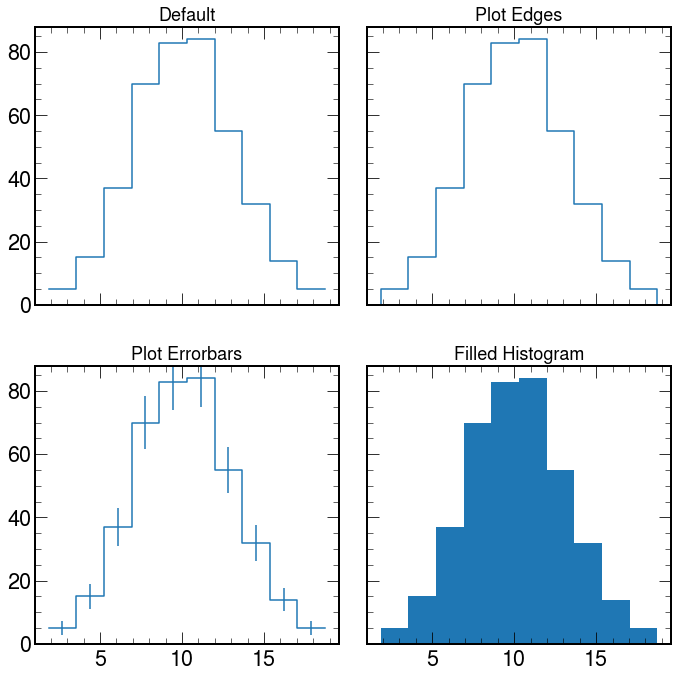

In [10]:
h, bins = np.histogram(np.random.normal(10,3,400), bins = 10)

f, axs = plt.subplots(2,2, sharex=True, sharey=True)
axs = axs.flatten()

axs[0].set_title("Default", fontsize=18)
hep.histplot(h, bins, ax=axs[0])

axs[1].set_title("Plot Edges", fontsize=18)
hep.histplot(h, bins, edges=True, ax=axs[1])

axs[2].set_title("Plot Errorbars", fontsize=18)
hep.histplot(h, bins, yerr=np.sqrt(h), ax=axs[2])

axs[3].set_title("Filled Histogram", fontsize=18)
hep.histplot(h, bins, histtype='fill', ax=axs[3])


plt.tight_layout()
plt.show()

## Plotting multiple at once

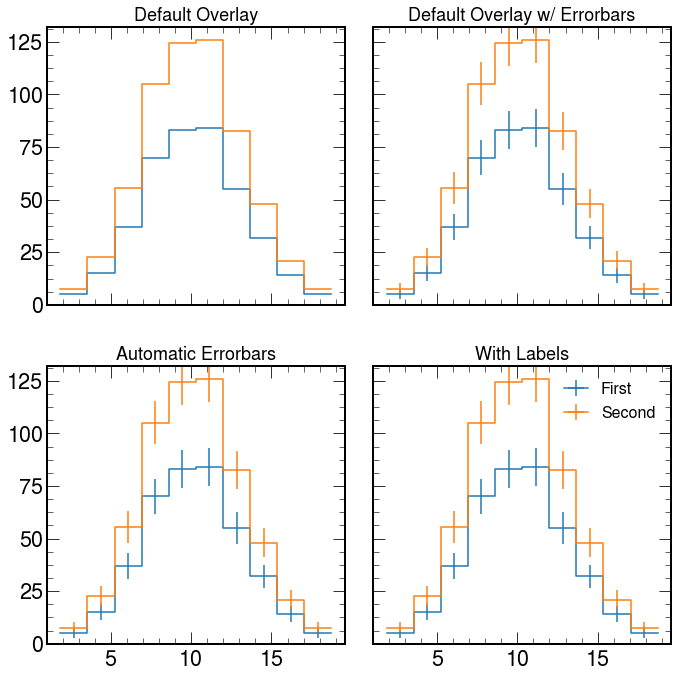

In [11]:
f, axs = plt.subplots(2,2, sharex=True, sharey=True)
axs = axs.flatten()

axs[0].set_title("Default Overlay", fontsize=18)
hep.histplot([h, 1.5*h], bins, ax=axs[0])

axs[1].set_title("Default Overlay w/ Errorbars", fontsize=18)
hep.histplot([h, 1.5*h], bins, yerr=[np.sqrt(h), np.sqrt(1.5*h)], ax=axs[1])


axs[2].set_title("Automatic Errorbars", fontsize=18)
hep.histplot([h, 1.5*h], bins, yerr=True, ax=axs[2])

axs[3].set_title("With Labels", fontsize=18)
hep.histplot([h, 1.5*h], bins, yerr=True, ax=axs[3], label=["First", "Second"])

axs[3].legend(fontsize=16)

plt.tight_layout()
plt.show()

## 1D Histogram Stacking

AttributeError: 'module' object has no attribute 'hplot'

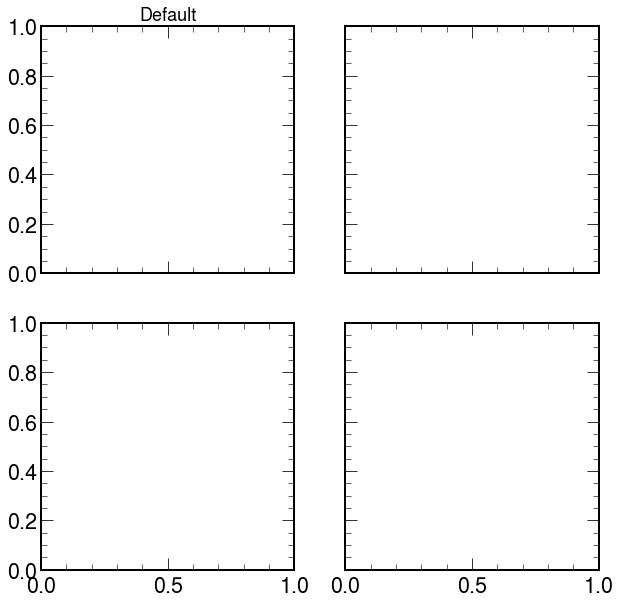

In [12]:
f, axs = plt.subplots(2,2, sharex=True, sharey=True)#, figsize=(10, 5))
axs = axs.flatten()

axs[0].set_title("Default", fontsize=18)
hep.histplot([h, 1.5*h], bins, stack=True, ax=axs[0])

axs[1].set_title("Plot Edges", fontsize=18)
hep.histplot([h, 1.5*h], bins, edges=True, stack=True,ax=axs[1])

axs[2].set_title("Plot Errorbars", fontsize=18)
hep.histplot([h, 1.5*h], bins, yerr=np.sqrt(h), stack=True, ax=axs[2])

axs[3].set_title("Filled Histogram", fontsize=18)
hep.histplot([1.5*h, h], bins, histtype='fill', stack=True, ax=axs[3])

plt.tight_layout()
plt.show()

## 2D Historam Example

# Additional stuff

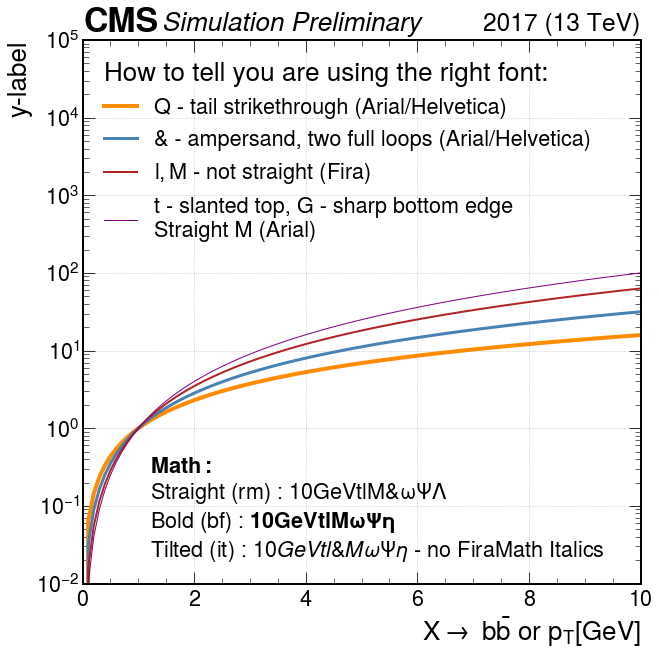

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
C = ['darkorange', 'steelblue', 'firebrick', 'purple']

# Figure
f, ax = plt.subplots()

# Make some data
x = np.linspace(0,10,101)
y0 = x**(1.2)
y1 = x**(1.5)
y2 = x**(1.8)
y3 = x**(2)

ax.plot(x, y0, lw=4, label=r"Q - tail strikethrough (Arial/Helvetica) ", c=C[0])
ax.plot(x, y1, lw=3, label=r"& - ampersand, two full loops (Arial/Helvetica)", c=C[1])
ax.plot(x, y2, lw=2, label=r"$\mathrm{l, M}$ - not straight (Fira)", c=C[2])
ax.plot(x, y3, lw=1, label=r"t - slanted top, G - sharp bottom edge" "\n" r"Straight M (Arial)", c=C[3])

# Set limits and labels
ax.set_xlim(0,10)
ax.set_ylim(0.01,100000)
ax.set_xlabel(r'$\mathrm{X \rightarrow\ b\bar{b}}$ or $\mathrm{p_T [GeV]}$', ha='right', x=1.0)
ax.set_ylabel('y-label', ha='right', y=1.0)

# Legend
leg = ax.legend(borderpad=0.5, frameon=False, loc=2)
leg.set_title('How to tell you are using the right font:')
leg._legend_box.align = "left" # Align legend title

# Annotationg and math examples
math_desc =  r"$\mathbf{Math:}$" \
      + "\n" +r"Straight (rm) : $\mathrm{10GeVtlM&\omega\Psi\Lambda}$" \
      + "\n" +r"Bold (bf) : $\mathbf{10GeVtlM\omega\Psi\eta}$" \
      + "\n" +r"Tilted (it) : $\mathit{10GeVtl&M\omega\Psi\eta}$ - no FiraMath Italics" 
ax.annotate(math_desc, xy=(0.12, 0.05), xycoords='axes fraction', fontsize = "small",
             ha='left', annotation_clip=False)

# Apply CMS labels and ticks
#ax = cms_annot(ax, data=True, lumi=2.5)
ax = hep.cms.cmslabel(ax)

ax.grid()
ax.semilogy()
f.savefig('Example2.png')
